Grade=83/100

Abstract: In this lab, pointed away from the Sun to capture the scattered sunlight off the atmosphere.

Introduction: The spectrum of an object is the flux of the light per unit wavelength. When the object emitting light is glowing due to hot gas, the locations of spectral lines are signatures of the elements contained in the gas. Measurements of the wavelengths of lines from stars uniquely identify the elements and radial velocities of stars, and emission vs. absorption lines yield the relative temperature and density of the source regions. For galaxies, we measure the integrated stellar emission and absorption. 

In [159]:
#Methods
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

sky1 = np.float64(fits.getdata('Sky1.fit'))
sky2 = np.float64(fits.getdata('Sky2.fit'))
sky3 = np.float64(fits.getdata('Sky3.fit'))
sky4 = np.float64(fits.getdata('Sky4.fit'))
sky5 = np.float64(fits.getdata('Sky5.fit'))

sky_average = (sky1 + sky2 + sky3 + sky4 + sky5) / 5

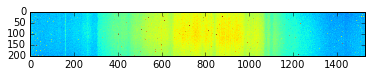

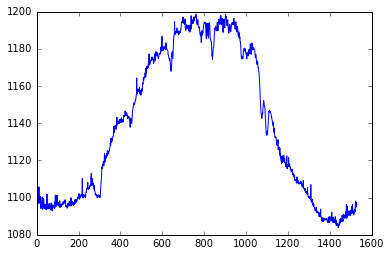

In [164]:
plt.imshow(sky_average[200:400, 0:1600], vmin = 1000, vmax = 1300)
plt.show()

y = sky_average[200:350]
i = 0
sun = np.array([])
sun.resize(1530)
while i <= 149:
    sun = sun + y[i]
    i = i + 1
sun = sun / 150
i = 0
for i in range(0, 1529):
    if sun[i+1] - sun[i] > 10:
        sun[i+1] = sun[i]
plt.plot(sun)
plt.show()

In [4]:
arclamp = np.float64(fits.getdata('arclamp.fit'))

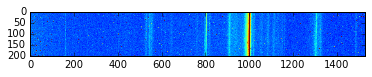

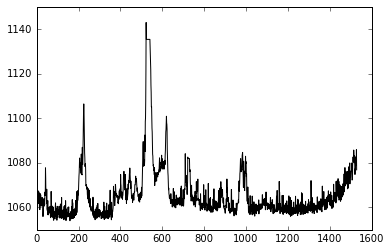

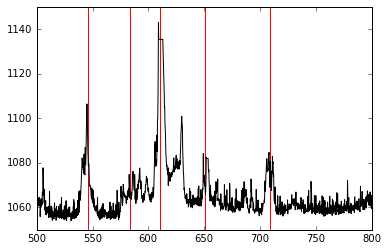

In [158]:
plt.imshow(arclamp[200:400, 0:1600], vmin = 1000, vmax = 1300)
plt.show()

y = arclamp[0:350]
i = 0
z = np.array([])
z.resize(1530)
while i <= 349:
    z = z + y[i]
    i = i + 1
z = z / 350
i = 0
for i in range(0, 1529):
    if z[i+1] - z[i] > 10:
        z[i+1] = z[i]
z = z[::-1]
xvec = np.arange(len(z))

lines = np.array([546, 583.6, 610.8, 650.4, 709])
xvec2 = 0.215 * (xvec + 2310)
for i in range(0, 5):
    plt.axvline(x = lines[i], ymin = 0, ymax = 1, color = 'r')
    i += 1
plt.plot(xvec2, z, 'k')
plt.xlim(500, 800)
plt.show()

In [161]:
original_lines = np.array([225, 420, 520, 670, 950])

def func(m, x, b):
    return m * x + b
mt, bt = (.22, .22*2250)

coeffs, fiterr = curve_fit(func, original_lines, lines, p0 = (mt, bt), maxfev = 10000)
print 'initial guess:', 'm = %s, b = %s' % (mt, bt)
print 'fitted parameters:', 'm = %s, b = %s' % (coeffs[0], coeffs[1])

initial guess: m = 0.22, b = 495.0
fitted parameters: m = 0.229542980027, b = 492.104560085


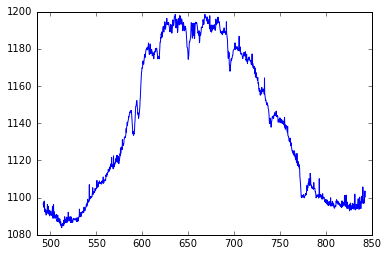

In [166]:
#Results
plt.plot((coeffs[0] * xvec + coeffs[1]), sun[::-1])
plt.xlim(485, 850)
plt.show()
# Hbeta @ 590 nm
# Na @ 740 nm
# O @ 772 nm

Conclusion: We were able to calibrate our spectrum rather accurately.